In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

***Bangalore City Cars***

In [22]:
#df = glob.glob(os.path.join('../cleaned_data/bangalore.xlsx'))
df= pd.read_excel('../cleaned_data/bangalore_cars_cleaned.xlsx')

In [23]:
df.dtypes

Insurance_Validity_Period           object
Fuel_Type                           object
Number_of_Seats                     object
Regional_Transport_Office           object
Transmission_Type                   object
Top_Features                        object
Comfort_and_Convenience             object
Interior_Features                   object
Exterior_Features                   object
Safety_Features                     object
Entertainment_and_Communication     object
Mileage_(km/l)                      object
Engine_Capacity                     object
Maximum_Power                       object
Torque                              object
Wheel_Size                          object
Battery_Type                        object
Kilometers_Driven                   object
Number_of_Owners                     int64
Original_Equipment_Manufacturer     object
Car_Model                           object
Model_Year                           int64
Central_Variant_ID                   int64
Variant_Nam

***Cleaned column 'Insurance_Validity_Period' from bangalore***

In [24]:
df['Insurance_Validity_Period'].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', nan, '2', '1', 'Not Available'], dtype=object)

In [25]:
check =df['Insurance_Validity_Period'].isin(['Not Available']).sum()
check

np.int64(5)

In [26]:
df['Insurance_Validity_Period']=df['Insurance_Validity_Period'].replace({
    'Third Party insurance':'Third Party',
    'Zero Dep':'Zero Depreciation',
    np.nan:'Unknown',
    'Not Available': 'Unknown',
    '1': 'One Year',
    '2':'Two Years'
})

In [27]:
#df[df['Insurance_Validity_Period'].isin(['Not Available', '1', '2'])
df['Insurance_Validity_Period'].unique()

array(['Third Party', 'Comprehensive', 'Zero Depreciation', 'Unknown',
       'Two Years', 'One Year'], dtype=object)

In [28]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'LPG', 'CNG', 'Electric'], dtype=object)

In [29]:
df['Fuel_Type'].isnull().sum()

np.int64(0)

In [30]:
df.head(5)

,Insurance_Validity_Period,Fuel_Type,Number_of_Seats,Regional_Transport_Office,Transmission_Type,Top_Features,Comfort_and_Convenience,Interior_Features,Exterior_Features,Safety_Features,...,Kilometers_Driven,Number_of_Owners,Original_Equipment_Manufacturer,Car_Model,Model_Year,Central_Variant_ID,Variant_Name,Listed_Price,Actual_Price,city
0,Third Party,Petrol,5 Seats,KA51,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",...,"1,20,000",3,Maruti,Maruti Celerio,2015,3979,VXI,400000.0,427093.247588,bangalore
1,Comprehensive,Petrol,5 Seats,KA05,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,"32,706",2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000.0,838093.247588,bangalore
2,Comprehensive,Petrol,5 Seats,KA03,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,"11,949",1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000.0,612093.247588,bangalore
3,Comprehensive,Petrol,5 Seats,KA53,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,"17,794",1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000.0,489093.247588,bangalore
4,Third Party,Diesel,5 Seats,KA04,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,"60,000",1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000.0,817093.247588,bangalore


***Cleaned Number_of_Seats column from bangalore***

In [31]:

df['Number_of_Seats'] = df['Number_of_Seats'].str.replace('Seats', '',regex= False).str.strip()

In [32]:
df['Number_of_Seats'].unique()

array(['5', '7', '4', '6', '8', '10', nan, '9'], dtype=object)

In [33]:
df[df['Number_of_Seats'].isnull()]

,Insurance_Validity_Period,Fuel_Type,Number_of_Seats,Regional_Transport_Office,Transmission_Type,Top_Features,Comfort_and_Convenience,Interior_Features,Exterior_Features,Safety_Features,...,Kilometers_Driven,Number_of_Owners,Original_Equipment_Manufacturer,Car_Model,Model_Year,Central_Variant_ID,Variant_Name,Listed_Price,Actual_Price,city
1175,Third Party,Petrol,NaN,KA03,Manual,[],NaN,NaN,NaN,NaN,...,"40,000",3,Maruti,Maruti Estilo,2009,4079,LXI,200000.0,227093.247588,bangalore


In [34]:
df.shape

(1481, 27)

In [35]:
df=df.drop(df[df['Number_of_Seats'].isnull()].index)


In [36]:
df['Number_of_Seats'].unique()

array(['5', '7', '4', '6', '8', '10', '9'], dtype=object)

In [37]:
df['Number_of_Seats']=df['Number_of_Seats'].astype(int)

In [38]:
df['Number_of_Seats'].dtypes

dtype('int64')

***Engine_Capacity  column***

In [39]:
df['Engine_Capacity'].unique()

array(['998 CC', '1497 CC', '1199 CC', '1197 CC', '1248 CC', '1956 CC',
       '1198 CC', '1462 CC', '2179 CC', '1950 CC', '1396 CC', '1995 CC',
       '1498 CC', '4663 CC', '1086 CC', '1991 CC', '1968 CC', '1998 CC',
       '2982 CC', '1461 CC', '1797 CC', '796 CC', '1353 CC', '2925 CC',
       '2987 CC', '2967 CC', '999 CC', '1341 CC', '1496 CC', '1582 CC',
       '1798 CC', '1120 CC', '1969 CC', '1451 CC', '814 CC', '1999 CC',
       '1591 CC', '1397 CC', '1368 CC', '1598 CC', '3198 CC', '1196 CC',
       '2993 CC', '2755 CC', '2143 CC', '2354 CC', '1332 CC', '2199 CC',
       '1997 CC', '1499 CC', '2148 CC', '2696 CC', '1364 CC', '2494 CC',
       '1373 CC', '1299 CC', '1061 CC', '1493 CC', '2497 CC', '1495 CC',
       '1590 CC', '1896 CC', '1330 CC', '1781 CC', '1390 CC', '1194 CC',
       '2953 CC', '1399 CC', '1595 CC', nan, '2496 CC', '0 CC', '1984 CC',
       '2694 CC', '1298 CC', '2362 CC', '970 CC', '2198 CC', '1599 CC',
       '993 CC', '2393 CC', '1389 CC', '1597 CC', '249

In [40]:
df['Engine_Capacity']=df['Engine_Capacity'].str.replace('CC','',regex=False).str.strip()

In [41]:
df['Engine_Capacity'].isnull().sum()

np.int64(3)

In [42]:
def extract_first_numeric(value):
    if isinstance(value, str):
        numbers = re.findall(r'\d+\.?\d*', value)  # Find all numeric sequences
        return numbers[0] if numbers else np.nan
    return np.nan

# Convert 'Engine_Capacity' to string and apply the function
df['Engine_Capacity'] = df['Engine_Capacity'].astype(str).apply(extract_first_numeric)


In [43]:
df['Engine_Capacity'] = pd.to_numeric(df['Engine_Capacity'], errors='coerce')

In [44]:
#df['Engine_Capacity'] = df['Engine_Capacity'].clip(upper=10.0)

In [45]:
df[df['Engine_Capacity'].isna()]

,Insurance_Validity_Period,Fuel_Type,Number_of_Seats,Regional_Transport_Office,Transmission_Type,Top_Features,Comfort_and_Convenience,Interior_Features,Exterior_Features,Safety_Features,...,Kilometers_Driven,Number_of_Owners,Original_Equipment_Manufacturer,Car_Model,Model_Year,Central_Variant_ID,Variant_Name,Listed_Price,Actual_Price,city
487,Third Party,Petrol,6,NaN,Manual,[],NaN,NaN,NaN,NaN,...,"10,000",3,Maruti,Maruti Gypsy,1995,4099,MG410W ST,400000.0,427093.247588,bangalore
490,Third Party,Petrol,8,KA18,Manual,[],NaN,NaN,NaN,NaN,...,"10,000",3,Maruti,Maruti Gypsy,1995,4100,MG410W HT,400000.0,427093.247588,bangalore
574,Third Party,Electric,4,KA03,Automatic,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Child Safety Locks', 'Halogen Headlamps', 'R...",...,"20,000",1,Mahindra,Mahindra e2o Plus,2017,5477,P6,550000.0,577093.247588,bangalore


In [46]:
#df.iloc[:, 10:][df['Original_Equipment_Manufacturer'] == 'Maruti']

In [47]:
df['Engine_Capacity'] = df.groupby('Original_Equipment_Manufacturer')['Engine_Capacity'].transform(lambda x: x.fillna(x.mean()))

In [48]:
print(df['Engine_Capacity'].isnull().sum())

0


In [49]:
# overall_mean = df['Engine_Capacity'].mean()
# df['Engine_Capacity'] = df['Engine_Capacity'].fillna(overall_mean)

In [50]:
df['Engine_Capacity'].isnull().sum()

np.int64(0)

In [51]:
df['Car_Model'].isnull().sum()

np.int64(0)

***Cleaned Regional_Transport_Office column from bangalore dataset***

In [52]:
df['Regional_Transport_Office']=df['Regional_Transport_Office'].fillna('KA03')#filled missing values using max value

In [53]:
df['Regional_Transport_Office'].isnull().sum()

np.int64(0)

In [54]:
df.isna().sum()

Insurance_Validity_Period            0
Fuel_Type                            0
Number_of_Seats                      0
Regional_Transport_Office            0
Transmission_Type                    0
Top_Features                         0
Comfort_and_Convenience             13
Interior_Features                   16
Exterior_Features                   20
Safety_Features                     21
Entertainment_and_Communication    135
Mileage_(km/l)                      42
Engine_Capacity                      0
Maximum_Power                       15
Torque                              15
Wheel_Size                         451
Battery_Type                         0
Kilometers_Driven                    0
Number_of_Owners                     0
Original_Equipment_Manufacturer      0
Car_Model                            0
Model_Year                           0
Central_Variant_ID                   0
Variant_Name                         0
Listed_Price                         0
Actual_Price             

***Clleaned Transmission_Type colum from bangalore dataset***

In [55]:
df['Transmission_Type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [56]:
df['Transmission_Type'].isnull().sum()

np.int64(0)

In [57]:
df.shape

(1480, 27)

***Cleaned Mileage_(km/l) column from bangalore dataset***

In [58]:
df['Mileage_(km/l)'].str[-5:].str.strip().value_counts()

Mileage_(km/l)
kmpl     1436
km/kg       2
Name: count, dtype: int64

In [59]:
df['Mileage_(km/l)'] = df['Mileage_(km/l)'].str.replace('kmpl','',regex = False).str.strip().str.replace('km/kg','',regex = False).str.strip()

In [60]:
df['Mileage_(km/l)'] = pd.to_numeric(df['Mileage_(km/l)'], errors='coerce')
# Fill remaining NaNs with the overall mean after group filling
overall_mean = df['Mileage_(km/l)'].mean()
df['Mileage_(km/l)'] = df['Mileage_(km/l)'].fillna(overall_mean)

# Check for any remaining NaNs
remaining_nans = df['Mileage_(km/l)'].isna().sum()
print(f"Remaining NaN values in 'Mileage_(km/l)': {remaining_nans}")


Remaining NaN values in 'Mileage_(km/l)': 0


In [61]:
df.isna().sum()

Insurance_Validity_Period            0
Fuel_Type                            0
Number_of_Seats                      0
Regional_Transport_Office            0
Transmission_Type                    0
Top_Features                         0
Comfort_and_Convenience             13
Interior_Features                   16
Exterior_Features                   20
Safety_Features                     21
Entertainment_and_Communication    135
Mileage_(km/l)                       0
Engine_Capacity                      0
Maximum_Power                       15
Torque                              15
Wheel_Size                         451
Battery_Type                         0
Kilometers_Driven                    0
Number_of_Owners                     0
Original_Equipment_Manufacturer      0
Car_Model                            0
Model_Year                           0
Central_Variant_ID                   0
Variant_Name                         0
Listed_Price                         0
Actual_Price             

In [62]:
# grouped = df.groupby('Fuel_Type')

In [63]:
# mean_mileage = grouped['Mileage_(km/l)'].mean()

In [64]:
# def fill_missing_mileage(row):
#     if pd.isna(row['Mileage_(km/l)']):
#         fuel_type = row['Fuel_Type']
#         return mean_mileage.get(fuel_type, None)  # Use .get() to handle any Fuel_Type with no mean value
#     else:
#         return row['Mileage_(km/l)']

# df['Mileage_(km/l)'] = df.apply(fill_missing_mileage, axis=1)


***Cleaned Wheel_Size column from the bangalore dataset***

In [65]:
df['Wheel_Size'].unique()

array([nan, '16', '14', '17', '15', '19', '13', '18', 'R18', '12', 'R16',
       'R17', '20', 'R15', 'R19', 'R14', '21'], dtype=object)

In [66]:
df['Wheel_Size'].isnull().sum()

np.int64(451)

In [67]:
df['Wheel_Size'] = df['Wheel_Size'].str.replace('R','',regex = False).str.strip()

In [68]:
df['Wheel_Size'] = pd.to_numeric(df['Wheel_Size'], errors='coerce')

In [69]:
df['Wheel_Size'] = df['Wheel_Size'].fillna(df['Wheel_Size'].mean())

In [70]:
df.isna().sum()

Insurance_Validity_Period            0
Fuel_Type                            0
Number_of_Seats                      0
Regional_Transport_Office            0
Transmission_Type                    0
Top_Features                         0
Comfort_and_Convenience             13
Interior_Features                   16
Exterior_Features                   20
Safety_Features                     21
Entertainment_and_Communication    135
Mileage_(km/l)                       0
Engine_Capacity                      0
Maximum_Power                       15
Torque                              15
Wheel_Size                           0
Battery_Type                         0
Kilometers_Driven                    0
Number_of_Owners                     0
Original_Equipment_Manufacturer      0
Car_Model                            0
Model_Year                           0
Central_Variant_ID                   0
Variant_Name                         0
Listed_Price                         0
Actual_Price             

In [71]:
df['Kilometers_Driven'].unique()

array(['1,20,000', '32,706', '11,949', '17,794', '60,000', '20,000',
       '37,772', '30,000', '37,000', '50,000', '24,887', '23,000',
       '48,928', '1,08,862', '80,000', '16,000', '65,376', '10,000',
       '67,000', '1,00,000', '18,083', '57,634', '1,10,000', '23,447',
       '33,000', '87,667', '40,000', '79,012', '31,344', '12,434',
       '12,000', '40,987', '18,157', '89,667', '56,997', '59,000',
       '18,835', '60,932', '33,539', '66,837', '400', '44,285', '25,000',
       '36,735', '79,000', '53,645', '53,982', '37,741', '17,367',
       '94,000', '33,700', '54,601', '64,000', '40,525', '44,154',
       '70,000', '68,039', '49,873', '90,000', '48,960', '68,000',
       '23,017', '83,000', '92,000', '62,139', '74,000', '26,500',
       '81,716', '24,000', '18,000', '38,197', '19,000', '14,000',
       '29,268', '64,374', '7,100', '43,679', '40,562', '58,600',
       '42,050', '65,017', '36,349', '83,394', '52,204', '89,000',
       '29,813', '13,345', '17,100', '75,000', '

In [72]:
df['Kilometers_Driven'].isnull().sum()

np.int64(0)

In [73]:
df['Kilometers_Driven']=df['Kilometers_Driven'].str.replace(',','',regex = False).str.strip()

In [74]:
df['Kilometers_Driven'].dtype

dtype('O')

In [75]:
df['Kilometers_Driven'] = df['Kilometers_Driven'].astype(int)

In [76]:
df['Kilometers_Driven'].dtype

dtype('int64')

In [77]:
df['Number_of_Owners'].unique()

array([3, 2, 1, 4, 5])

In [78]:
df['Number_of_Owners'].isnull().sum()

np.int64(0)

In [79]:
df['Number_of_Owners'].dtype

dtype('int64')

In [80]:
df['Original_Equipment_Manufacturer'].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault'], dtype=object)

In [81]:
df['Original_Equipment_Manufacturer'].isnull().sum()

np.int64(0)

In [82]:
df['Model_Year'].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1995, 1998, 2004,
       2003, 2001, 2002, 2000])

In [83]:
check =df['Model_Year'].isin([',']).sum()
check

np.int64(0)

In [84]:
df['Model_Year'].isnull().sum()

np.int64(0)

In [85]:
df['Model_Year'].dtype

dtype('int64')

In [86]:
df['Central_Variant_ID'].head()

0    3979
1    6087
2    2983
3    1867
4    4277
Name: Central_Variant_ID, dtype: int64

In [87]:
df['Central_Variant_ID'].isnull().sum()

np.int64(0)

In [88]:
check =df['Central_Variant_ID'].isin([',']).sum()
check

np.int64(0)

In [89]:
df['Central_Variant_ID'].dtype

dtype('int64')

In [90]:
df['Variant_Name'].head()

0                         VXI
1    1.5 Petrol Titanium BSIV
2             1.2 Revotron XZ
3          1.2 Kappa S Option
4               DDiS 200 Zeta
Name: Variant_Name, dtype: object

In [91]:
df['Variant_Name'].isnull().sum()

np.int64(0)

In [92]:
check =df['Variant_Name'].isin([',']).sum()
check

np.int64(0)

In [93]:
df['Listed_Price'].head()

0    400000.0
1    811000.0
2    585000.0
3    462000.0
4    790000.0
Name: Listed_Price, dtype: float64

In [94]:
df['Listed_Price'] = df['Listed_Price'].astype(int)

In [95]:
pd.set_option('display.float_format', '{:.0f}'.format)

# Now, when you print your DataFrame, it will display without scientific notation
print(df)


     Insurance_Validity_Period Fuel_Type  Number_of_Seats  \
0                  Third Party    Petrol                5   
1                Comprehensive    Petrol                5   
2                Comprehensive    Petrol                5   
3                Comprehensive    Petrol                5   
4                  Third Party    Diesel                5   
...                        ...       ...              ...   
1476             Comprehensive    Diesel                7   
1477               Third Party    Petrol                5   
1478             Comprehensive    Petrol                5   
1479             Comprehensive    Diesel                5   
1480             Comprehensive    Petrol                5   

     Regional_Transport_Office Transmission_Type  \
0                         KA51            Manual   
1                         KA05            Manual   
2                         KA03            Manual   
3                         KA53            Manual   
4      

In [96]:
df['Listed_Price'].unique()

array([    400000,     811000,     585000,     462000,     790000,
          1900000,     345000,    1200000,     960000,     690000,
           682000,     825000,     595000,    1350000,    5595000,
           521000,    1005000,     775000,    2200000,     582000,
          1090000,     457000,    4900000,     550000,     570000,
           220000,    4145000,     861000,    1785000,     802999,
          2565000,     674000,     349000,    1050000,    4425000,
           405999,    4965000,    1100000,     594000,     710000,
           692000,     650000,    2090000,     411000,    3675000,
           610000,    1675000,     530000,    7990000,     250000,
           715000,    3500000,    2250000,     625000,    2695000,
           428000,     695000,     930000,     455000,    1195000,
          2175000,     442000,     500000,    3395000,     537000,
           750000,    1790000,     468000,     420000,     919999,
           533000,     850000,     751000,     388000,     490

In [97]:
df['Listed_Price'].dtype

dtype('int64')

In [98]:
df['Listed_Price'].isnull().sum()

np.int64(0)

In [99]:
df['Actual_Price'].head()

0   427093
1   838093
2   612093
3   489093
4   817093
Name: Actual_Price, dtype: float64

In [100]:
df['Actual_Price']=df['Actual_Price'].astype(int)

In [101]:
pd.set_option('display.float_format', '{:.0f}'.format)

# Now, when you print your DataFrame, it will display without scientific notation
print(df)


     Insurance_Validity_Period Fuel_Type  Number_of_Seats  \
0                  Third Party    Petrol                5   
1                Comprehensive    Petrol                5   
2                Comprehensive    Petrol                5   
3                Comprehensive    Petrol                5   
4                  Third Party    Diesel                5   
...                        ...       ...              ...   
1476             Comprehensive    Diesel                7   
1477               Third Party    Petrol                5   
1478             Comprehensive    Petrol                5   
1479             Comprehensive    Diesel                5   
1480             Comprehensive    Petrol                5   

     Regional_Transport_Office Transmission_Type  \
0                         KA51            Manual   
1                         KA05            Manual   
2                         KA03            Manual   
3                         KA53            Manual   
4      

In [102]:
# Write the DataFrame to Excel, ensuring that floats are saved with no decimals
df.to_excel('bangalore_cars_cleaned.xlsx', index=False, float_format='%.0f')


In [103]:
df['Actual_Price'].dtype

dtype('int64')

In [104]:
df['Actual_Price'].unique()

array([    427093,     838093,     612093,     489093,     817093,
          1927093,     372093,    1227093,     987093,     717093,
           709093,     852093,     622093,    1377093,    5622093,
           548093,    1032093,     802093,    2227093,     609093,
          1117093,     484093,    4927093,     577093,     585000,
           247093,    4172093,     888093,    1812093,     821000,
          2592093,     701093,     376093,    1077093,    4452093,
           411000,    4992093,    1127093,     621093,     737093,
           699000,     677093,    2117093,     420000,    3702093,
           637093,    1702093,     557093,    8017093,     277093,
           742093,    3527093,    2277093,     652093,    2722093,
           436000,     722093,     957093,     459999,    1222093,
          2202093,     463000,     527093,    3422093,     581000,
           777093,    1817093,     515000,     447093,     947093,
           593000,     877093,     780000,     415093,     517

In [105]:
df['Actual_Price'].isnull().sum()

np.int64(0)

In [106]:
df.iloc[:, 11:].head()

,Mileage_(km/l),Engine_Capacity,Maximum_Power,Torque,Wheel_Size,Battery_Type,Kilometers_Driven,Number_of_Owners,Original_Equipment_Manufacturer,Car_Model,Model_Year,Central_Variant_ID,Variant_Name,Listed_Price,Actual_Price,city
0,23,998,67.04bhp,90Nm,16,Hatchback,120000,3,Maruti,Maruti Celerio,2015,3979,VXI,400000,427093,bangalore
1,17,1497,121.31bhp,150Nm,16,SUV,32706,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000,838093,bangalore
2,24,1199,84bhp,114Nm,14,Hatchback,11949,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000,612093,bangalore
3,19,1197,81.86bhp,113.75Nm,14,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000,489093,bangalore
4,24,1248,88.5bhp,200Nm,16,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000,817093,bangalore


In [107]:
df.isna().sum()

Insurance_Validity_Period            0
Fuel_Type                            0
Number_of_Seats                      0
Regional_Transport_Office            0
Transmission_Type                    0
Top_Features                         0
Comfort_and_Convenience             13
Interior_Features                   16
Exterior_Features                   20
Safety_Features                     21
Entertainment_and_Communication    135
Mileage_(km/l)                       0
Engine_Capacity                      0
Maximum_Power                       15
Torque                              15
Wheel_Size                           0
Battery_Type                         0
Kilometers_Driven                    0
Number_of_Owners                     0
Original_Equipment_Manufacturer      0
Car_Model                            0
Model_Year                           0
Central_Variant_ID                   0
Variant_Name                         0
Listed_Price                         0
Actual_Price             

In [108]:
df['Engine_Capacity'].isnull().sum()

np.int64(0)

In [109]:
df[df['Engine_Capacity'].isnull()]

,Insurance_Validity_Period,Fuel_Type,Number_of_Seats,Regional_Transport_Office,Transmission_Type,Top_Features,Comfort_and_Convenience,Interior_Features,Exterior_Features,Safety_Features,...,Kilometers_Driven,Number_of_Owners,Original_Equipment_Manufacturer,Car_Model,Model_Year,Central_Variant_ID,Variant_Name,Listed_Price,Actual_Price,city


In [110]:
df['Maximum_Power'].unique()

array(['67.04bhp', '121.31bhp', '84bhp', '81.86bhp', '88.5bhp', '170bhp',
       '67bhp', '118.35bhp', '103.25bhp', '83.1bhp', '88.7bhp',
       '83.83bhp', '140bhp', '187.74bhp', '88.76bhp', '117.3bhp', '177 ',
       '88.50bhp', '104.55bhp', '453.26bhp', '68bhp', '62.1bhp',
       '194.4bhp', '174.33bhp', '167.67bhp', '103bhp', '194bhp',
       '248.08bhp', '171 PS ', '108.5bhp', '81.83bhp', '88.73bhp',
       '147.5bhp', '47.33bhp', '120bhp', '189.08bhp', '138.08bhp',
       '281.61bhp', '46.3bhp', '254.8bhp', '241.4bhp', '83 PS ',
       '65.71bhp', '103.52bhp', '120.69bhp', '126.2bhp', '74bhp',
       '188bhp', '178bhp', '85.80bhp', '118.36bhp', '116.3bhp',
       '103.6bhp', '108.6bhp', '70bhp', '82.85bhp', '77bhp', '68.05bhp',
       '190bhp', '141bhp', '86.8bhp', '81.80bhp', '67.1bhp', '71.01bhp',
       '55.2bhp', '103.2bhp', '105.5bhp', '167.68bhp', '156.9bhp',
       '121.3bhp', '138.12bhp', '147.94bhp', '170 ', '160.77bhp',
       '138.1bhp', '78.9bhp', '102.57bhp', '174.3b

In [111]:
df['Maximum_Power'].str.extract(r'([A-Za-z]+)', expand=False).unique()

array(['bhp', nan, 'PS', 'hp', 'kW'], dtype=object)

In [112]:
def convert_to_bhp(value):
    value = str(value).strip()
    
    # Extract numeric value
    numeric_value = re.sub(r'[^\d.]+', '', value)
    
    # Conversion factors
    ps_to_bhp = 0.986
    kw_to_bhp = 1.341
    
    if 'PS' in value:
        return float(numeric_value) * ps_to_bhp
    elif 'kW' in value:
        return float(numeric_value) * kw_to_bhp
    elif 'bhp' in value:
        return float(numeric_value)
    else:
        try:
            return float(numeric_value)  # Default case for numeric values with no unit
        except ValueError:
            return np.nan  # Return NaN for any unrecognized format


In [113]:
 #Apply the conversion function to the 'Maximum_Power' column
df['Maximum_Power'] = df['Maximum_Power'].apply(convert_to_bhp)

In [114]:
df['Maximum_Power'] = df['Maximum_Power'].fillna(df['Maximum_Power'].mean())

In [115]:
df['Maximum_Power']=df['Maximum_Power'].fillna(0)

In [116]:
df['Maximum_Power'].isnull().sum()

np.int64(0)

In [117]:
df.isna().sum()


Insurance_Validity_Period            0
Fuel_Type                            0
Number_of_Seats                      0
Regional_Transport_Office            0
Transmission_Type                    0
Top_Features                         0
Comfort_and_Convenience             13
Interior_Features                   16
Exterior_Features                   20
Safety_Features                     21
Entertainment_and_Communication    135
Mileage_(km/l)                       0
Engine_Capacity                      0
Maximum_Power                        0
Torque                              15
Wheel_Size                           0
Battery_Type                         0
Kilometers_Driven                    0
Number_of_Owners                     0
Original_Equipment_Manufacturer      0
Car_Model                            0
Model_Year                           0
Central_Variant_ID                   0
Variant_Name                         0
Listed_Price                         0
Actual_Price             

In [118]:
df['Torque'].isnull().sum()

np.int64(15)

In [119]:
df['Torque'] = df['Torque'].str.replace('Nm','',regex = False).str.strip().str.replace('nm','',regex = False).str.strip()

In [120]:
df['Torque'].dtype

dtype('O')

In [121]:
df['Torque'] = pd.to_numeric(df['Torque'], errors='coerce')

In [122]:
df['Torque'] = df['Torque'].fillna(df['Torque'].mean())


In [123]:
df['Torque'].dtype

dtype('float64')

In [124]:
df['Torque'].isnull().sum()

np.int64(0)

In [125]:
df.isna().sum()

Insurance_Validity_Period            0
Fuel_Type                            0
Number_of_Seats                      0
Regional_Transport_Office            0
Transmission_Type                    0
Top_Features                         0
Comfort_and_Convenience             13
Interior_Features                   16
Exterior_Features                   20
Safety_Features                     21
Entertainment_and_Communication    135
Mileage_(km/l)                       0
Engine_Capacity                      0
Maximum_Power                        0
Torque                               0
Wheel_Size                           0
Battery_Type                         0
Kilometers_Driven                    0
Number_of_Owners                     0
Original_Equipment_Manufacturer      0
Car_Model                            0
Model_Year                           0
Central_Variant_ID                   0
Variant_Name                         0
Listed_Price                         0
Actual_Price             

In [126]:
df['Entertainment_and_Communication'].value_counts(sort=True)

Entertainment_and_Communication
['Cd Player', 'Radio', 'Speakers Front', 'Speakers Rear']                                                                                                                                         108
['Cd Player', 'Radio', 'Speakers Front', 'Speakers Rear', 'Integrated2Din Audio', 'Usb Auxiliary Input', 'Bluetooth']                                                                             104
['Cd Player', 'Radio', 'Speakers Front', 'Speakers Rear', 'Integrated2Din Audio', 'Usb Auxiliary Input', 'Bluetooth', 'Touch Screen', 'Number Of Speaker']                                         83
['Cd Player', 'Radio', 'Speakers Front', 'Speakers Rear', 'Integrated2Din Audio', 'Usb Auxiliary Input', 'Bluetooth', 'Number Of Speaker']                                                         65
['Radio', 'Speakers Front', 'Speakers Rear', 'Integrated2Din Audio', 'Usb Auxiliary Input', 'Bluetooth', 'Touch Screen', 'Number Of Speaker']                                   

In [127]:
df['Entertainment_and_Communication'] = df['Entertainment_and_Communication'].fillna(df['Entertainment_and_Communication'].value_counts()[0])

C:\Users\Green Gen Tech\AppData\Local\Temp\ipykernel_800\1800411979.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['Entertainment_and_Communication'] = df['Entertainment_and_Communication'].fillna(df['Entertainment_and_Communication'].value_counts()[0])


In [128]:
df.to_excel('preprocessed_bangalore_cars.xlsx', index=False)


In [108]:
df = pd.read_excel('../preprocessed_cars/preprocessed_bangalore_cars.xlsx')

In [115]:
df['Entertainment_and_Communication'].isnull().sum()

np.int64(0)

In [69]:
# df['Entertainment_and_Communication'] = df['Entertainment_and_Communication'].str.replace('108','Unknown',regex = False).str.strip()

In [70]:
df.head()

,Insurance_Validity_Period,Fuel_Type,Number_of_Seats,Regional_Transport_Office,Transmission_Type,Top_Features,Comfort_and_Convenience,Interior_Features,Exterior_Features,Safety_Features,Entertainment_and_Communication,Mileage_(km/l),Engine_Capacity,Maximum_Power,Torque,Wheel_Size,Battery_Type,Kilometers_Driven,Number_of_Owners,Original_Equipment_Manufacturer,Car_Model,Model_Year,Central_Variant_ID,Variant_Name,Listed_Price,Actual_Price,city
0,Third Party,Petrol,5,KA51,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",NaN,23.10,998.0,67.04,90.00,15.683188,Hatchback,120000,3,Maruti,Maruti Celerio,2015,3979,VXI,400000,427093,bangalore
1,Comprehensive,Petrol,5,KA05,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea...",17.00,1497.0,121.31,150.00,16.000000,SUV,32706,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000,838093,bangalore
2,Comprehensive,Petrol,5,KA03,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea...",23.84,1199.0,84.00,114.00,14.000000,Hatchback,11949,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000,612093,bangalore
3,Comprehensive,Petrol,5,KA53,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea...",19.10,1197.0,81.86,113.75,14.000000,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000,489093,bangalore
4,Third Party,Diesel,5,KA04,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Radio', 'Audio System Remote Control', 'Spea...",23.65,1248.0,88.50,200.00,16.000000,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000,817093,bangalore


In [71]:
# #droping unwanted columns
# df = df.drop(columns=['Regional_Transport_Office','Original_Equipment_Manufacturer', 'Central_Variant_ID', 'Variant_Name'])

In [72]:
# # lable encoding for ordinal column
# le = LabelEncoder()
# df['Insurance_Validity_Period'] = le.fit_transform(df['Insurance_Validity_Period'])

In [73]:
# # One-Hot Encoding for nominal columns
# nominal_cols = ['Car_Model','Fuel_Type', 'Transmission_Type', 'Battery_Type', 'city']

# df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


In [13]:
# # Example for handling one feature column like 'Top_Features',Comfort_and_Convenience,Interior_Features,Safety_Features
# #Exterior_Features ,Safety_Features,Entertainment_and_Communication
# df['Top_Features'] = df['Top_Features'].str.split(',')

# # Expand and One-Hot Encode
# df_top_features = df['Top_Features'].explode().str.strip().str.get_dummies().groupby(level=0).max()
# df = pd.concat([df, df_top_features], axis=1).drop(columns=['Top_Features'])


In [326]:
df = pd.read_excel('../preprocessed_cars/preprocessed_bangalore_cars.xlsx')

In [327]:
# Fill NaN values with the most frequent list (mode)

# list_columns =['Top_Features','Comfort_and_Convenience','Interior_Features','Safety_FeaturesExterior_Features' ,'Safety_Features','Entertainment_and_Communication']

# for col in list_columns:
# most_frequent = df['Entertainment_and_Communication'].mode()[0]
# df['Entertainment_and_Communication'] = df['Entertainment_and_Communication'].fillna(most_frequent)

# # Proceed with one-hot encoding
# df = pd.get_dummies(df['Entertainment_and_Communication'].apply(pd.Series).stack()).groupby(level=0).sum()


In [328]:
df.head()

,Insurance_Validity_Period,Fuel_Type,Number_of_Seats,Regional_Transport_Office,Transmission_Type,Top_Features,Comfort_and_Convenience,Interior_Features,Exterior_Features,Safety_Features,...,Kilometers_Driven,Number_of_Owners,Original_Equipment_Manufacturer,Car_Model,Model_Year,Central_Variant_ID,Variant_Name,Listed_Price,Actual_Price,city
0,Third Party,Petrol,5,KA51,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",...,120000,3,Maruti,Maruti Celerio,2015,3979,VXI,400000,427093,bangalore
1,Comprehensive,Petrol,5,KA05,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,32706,2,Ford,Ford Ecosport,2018,6087,1.5 Petrol Titanium BSIV,811000,838093,bangalore
2,Comprehensive,Petrol,5,KA03,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,11949,1,Tata,Tata Tiago,2018,2983,1.2 Revotron XZ,585000,612093,bangalore
3,Comprehensive,Petrol,5,KA53,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,17794,1,Hyundai,Hyundai Xcent,2014,1867,1.2 Kappa S Option,462000,489093,bangalore
4,Third Party,Diesel,5,KA04,Manual,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...",...,60000,1,Maruti,Maruti SX4 S Cross,2015,4277,DDiS 200 Zeta,790000,817093,bangalore


In [329]:
df.isnull().sum()

Insurance_Validity_Period          0
Fuel_Type                          0
Number_of_Seats                    0
Regional_Transport_Office          0
Transmission_Type                  0
Top_Features                       0
Comfort_and_Convenience            0
Interior_Features                  0
Exterior_Features                  0
Safety_Features                    0
Entertainment_and_Communication    0
Mileage_(km/l)                     0
Engine_Capacity                    0
Maximum_Power                      0
Torque                             0
Wheel_Size                         0
Battery_Type                       0
Kilometers_Driven                  0
Number_of_Owners                   0
Original_Equipment_Manufacturer    0
Car_Model                          0
Model_Year                         0
Central_Variant_ID                 0
Variant_Name                       0
Listed_Price                       0
Actual_Price                       0
city                               0
d

In [330]:
#Dropping unwanted columns
df = df.drop(columns=['Regional_Transport_Office', 'Original_Equipment_Manufacturer', 'Central_Variant_ID', 'Variant_Name'])


In [331]:
# # Clean the column names by removing unwanted characters (with proper escaping for square brackets)
# df.columns = df.columns.str.strip().str.replace(r"[\[\]']", '', regex=True)

# # If you want to also replace unwanted characters inside the DataFrame values:
# df = df.replace({"'": "", r"\[": "", r"\]": "", ",": ""}, regex=True)

# # Display the cleaned DataFrame
# print(df.head())


In [332]:
le = LabelEncoder()
df['Insurance_Validity_Period'] = le.fit_transform(df['Insurance_Validity_Period'])

In [333]:
df['Insurance_Validity_Period'].unique()

array([2, 0, 5, 4, 3, 1])

In [334]:
nominal_cols = ['Car_Model', 'Fuel_Type', 'Transmission_Type', 'Battery_Type', 'city']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# Identify the boolean columns (which contain True and False)
boolean_cols = df.select_dtypes(include=['bool']).columns

# Convert only the boolean columns to integers (True -> 1, False -> 0)
df[boolean_cols] = df[boolean_cols].astype(int)

In [335]:
print(df.columns)


Index(['Insurance_Validity_Period', 'Number_of_Seats', 'Top_Features',
       'Comfort_and_Convenience', 'Interior_Features', 'Exterior_Features',
       'Safety_Features', 'Entertainment_and_Communication', 'Mileage_(km/l)',
       'Engine_Capacity',
       ...
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Type_Manual',
       'Battery_Type_Coupe', 'Battery_Type_Hatchback', 'Battery_Type_MUV',
       'Battery_Type_Minivans', 'Battery_Type_Pickup Trucks',
       'Battery_Type_SUV', 'Battery_Type_Sedan'],
      dtype='object', length=227)


In [336]:
df.head()

,Insurance_Validity_Period,Number_of_Seats,Top_Features,Comfort_and_Convenience,Interior_Features,Exterior_Features,Safety_Features,Entertainment_and_Communication,Mileage_(km/l),Engine_Capacity,...,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Type_Manual,Battery_Type_Coupe,Battery_Type_Hatchback,Battery_Type_MUV,Battery_Type_Minivans,Battery_Type_Pickup Trucks,Battery_Type_SUV,Battery_Type_Sedan
0,2,5,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Digital Odomete...","['Adjustable Head Lights', 'Manually Adjustabl...","['Centeral Locking', 'Child Safety Locks', 'Da...",108,23.10,998.0,...,0,1,1,0,1,0,0,0,0,0
1,0,5,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea...",17.00,1497.0,...,0,1,1,0,0,0,0,0,1,0
2,0,5,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea...",23.84,1199.0,...,0,1,1,0,1,0,0,0,0,0
3,0,5,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Cd Player', 'Radio', 'Speakers Front', 'Spea...",19.10,1197.0,...,0,1,1,0,0,0,0,0,0,1
4,2,5,"['Power Steering', 'Power Windows Front', 'Air...","['Power Steering', 'Power Windows Front', 'Pow...","['Air Conditioner', 'Heater', 'Adjustable Stee...","['Adjustable Head Lights', 'Fog Lights Front',...","['Anti Lock Braking System', 'Centeral Locking...","['Radio', 'Audio System Remote Control', 'Spea...",23.65,1248.0,...,0,0,1,0,0,0,0,0,1,0


In [337]:
print(df['Car_Model_Renault Triber'].unique())


[0 1]


In [338]:
print(df.dtypes)


Insurance_Validity_Period      int64
Number_of_Seats                int64
Top_Features                  object
Comfort_and_Convenience       object
Interior_Features             object
                               ...  
Battery_Type_MUV               int64
Battery_Type_Minivans          int64
Battery_Type_Pickup Trucks     int64
Battery_Type_SUV               int64
Battery_Type_Sedan             int64
Length: 227, dtype: object


In [339]:
import ast

In [341]:
# Function to replace integers with "unknown"
def replace_integers(x):
    if isinstance(x, int):
        return 'unknown'
    else:
        return x


In [342]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x  # Or return an empty list or other placeholder if needed

In [343]:
list_like_cols = ['Top_Features', 'Comfort_and_Convenience', 'Interior_Features', 'Exterior_Features', 'Safety_Features', 'Entertainment_and_Communication']

for col in list_like_cols:
    df[col] = df[col].apply(replace_integers)
    df[col] = df[col].apply(lambda x: safe_literal_eval(x) if isinstance(x, str) else x)
    # Extract unique features
    unique_features = set()
    for features in df[col]:
        unique_features.update(features)

    unique_features = list(unique_features)

    # Create a DataFrame for one-hot encoded columns
    one_hot_encoded_df = pd.DataFrame()

    for feature in unique_features:
        one_hot_encoded_df[f'{col}_{feature}'] = df[col].apply(lambda x: 1 if feature in x else 0)

    # Concatenate the new DataFrame with the original DataFrame
    df = pd.concat([df.drop(columns=[col]), one_hot_encoded_df], axis=1)

In [344]:
column_list = df.columns.tolist()
print(column_list)


['Insurance_Validity_Period', 'Number_of_Seats', 'Mileage_(km/l)', 'Engine_Capacity', 'Maximum_Power', 'Torque', 'Wheel_Size', 'Kilometers_Driven', 'Number_of_Owners', 'Model_Year', 'Listed_Price', 'Actual_Price', 'Car_Model_Audi A3 cabriolet', 'Car_Model_Audi A4', 'Car_Model_Audi A6', 'Car_Model_Audi Q3', 'Car_Model_Audi Q5', 'Car_Model_Audi Q7', 'Car_Model_BMW 1 Series', 'Car_Model_BMW 3 Series', 'Car_Model_BMW 3 Series GT', 'Car_Model_BMW 5 Series', 'Car_Model_BMW 6 Series', 'Car_Model_BMW X1', 'Car_Model_BMW X3', 'Car_Model_BMW X4', 'Car_Model_BMW X5', 'Car_Model_BMW X7', 'Car_Model_Chevrolet Beat', 'Car_Model_Chevrolet Cruze', 'Car_Model_Chevrolet Enjoy', 'Car_Model_Chevrolet Spark', 'Car_Model_Chevrolet Tavera', 'Car_Model_Citroen C3', 'Car_Model_Citroen C5 Aircross', 'Car_Model_Datsun GO', 'Car_Model_Datsun RediGO', 'Car_Model_Fiat Linea', 'Car_Model_Fiat Palio', 'Car_Model_Fiat Punto', 'Car_Model_Fiat Punto Abarth', 'Car_Model_Fiat Punto EVO', 'Car_Model_Ford Aspire', 'Car_Mode

In [345]:
df.head()

,Insurance_Validity_Period,Number_of_Seats,Mileage_(km/l),Engine_Capacity,Maximum_Power,Torque,Wheel_Size,Kilometers_Driven,Number_of_Owners,Model_Year,...,Entertainment_and_Communication_u,Entertainment_and_Communication_w,Entertainment_and_Communication_Cd Player,Entertainment_and_Communication_Internal Storage,Entertainment_and_Communication_o,Entertainment_and_Communication_n,Entertainment_and_Communication_Dvd Player,Entertainment_and_Communication_Speakers Rear,Entertainment_and_Communication_Bluetooth,Entertainment_and_Communication_Usb Auxiliary Input
0,2,5,23.10,998.0,67.04,90.00,15.683188,120000,3,2015,...,1,1,0,0,1,1,0,0,0,0
1,0,5,17.00,1497.0,121.31,150.00,16.000000,32706,2,2018,...,0,0,1,0,0,0,0,1,1,1
2,0,5,23.84,1199.0,84.00,114.00,14.000000,11949,1,2018,...,0,0,1,0,0,0,0,1,1,1
3,0,5,19.10,1197.0,81.86,113.75,14.000000,17794,1,2014,...,0,0,1,0,0,0,0,1,1,1
4,2,5,23.65,1248.0,88.50,200.00,16.000000,60000,1,2015,...,0,0,0,0,0,0,0,1,1,1


In [356]:
numerical_columns = [
    'Number_of_Seats', 'Mileage_(km/l)', 'Engine_Capacity', 'Maximum_Power',
    'Torque', 'Wheel_Size', 'Kilometers_Driven', 'Number_of_Owners', 
    'Model_Year', 'Listed_Price', 'Actual_Price'
]

df[numerical_columns].describe()

,Number_of_Seats,Mileage_(km/l),Engine_Capacity,Maximum_Power,Torque,Wheel_Size,Kilometers_Driven,Number_of_Owners,Model_Year,Listed_Price,Actual_Price
count,1480.000000,1480.000000,1480.000000,1.480000e+03,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1.480000e+03,1.480000e+03
mean,5.205405,19.034193,1446.607743,1.000078e+04,178.053315,15.683188,57402.120270,1.510135,2016.122973,7.331031e+07,7.333741e+07
std,0.668805,5.190169,486.854736,9.544147e+04,106.008392,1.204207,33182.036145,0.737230,4.057366,6.827432e+08,6.827432e+08
min,4.000000,7.810000,0.000000,2.540000e+01,9.400000,12.000000,150.000000,1.000000,1995.000000,1.000000e+05,1.270930e+05
25%,5.000000,17.000000,1197.000000,8.183000e+01,113.000000,15.000000,30000.000000,1.000000,2014.000000,4.900000e+05,5.150000e+05
50%,5.000000,18.900000,1248.000000,8.873000e+01,144.500000,15.683188,52528.500000,1.000000,2017.000000,6.790000e+05,7.030465e+05
75%,5.000000,21.400000,1582.000000,1.213000e+02,215.750000,16.000000,80000.000000,2.000000,2019.000000,1.035000e+06,1.062093e+06
max,10.000000,140.000000,5000.000000,1.169988e+06,700.000000,21.000000,199000.000000,5.000000,2023.000000,8.000000e+09,8.000027e+09


In [357]:
from scipy import stats

# Assuming df is your DataFrame
numerical_columns = ['Number_of_Seats', 'Mileage_(km/l)', 'Engine_Capacity', 'Maximum_Power', 'Torque', 'Wheel_Size', 'Kilometers_Driven', 'Number_of_Owners', 'Model_Year', 'Listed_Price', 'Actual_Price']

# Calculate Z-Scores
z_scores = stats.zscore(df[numerical_columns])

# Create a DataFrame with Z-Scores
z_df = pd.DataFrame(z_scores, columns=numerical_columns)

# Find outliers (e.g., Z-score > 3 or < -3)
outliers = (z_df.abs() > 3).any(axis=1)

# Filter outliers from the original DataFrame
df_outliers = df[outliers]


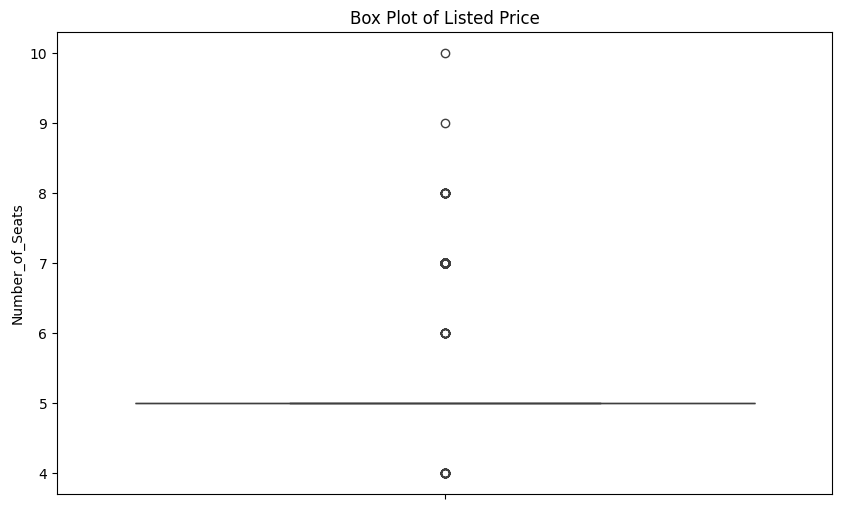

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Box plot for 'Listed_Price'
plt.figure(figsize=(10, 6))
sns.boxplot(df['Number_of_Seats'])
plt.title('Box Plot of Listed Price')
plt.show()


In [360]:
# Remove outliers
df_cleaned = df[~outliers]

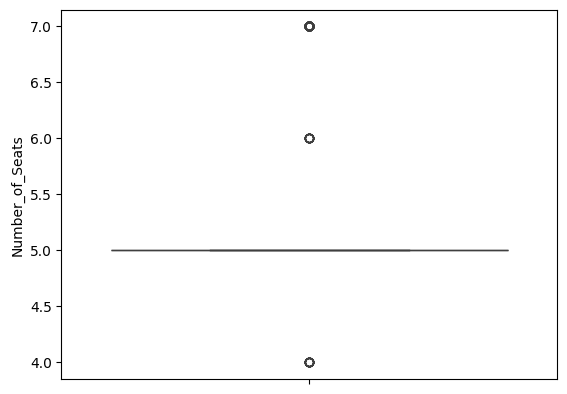

In [361]:
# finding outliers 
sns.boxplot(data = df_cleaned['Number_of_Seats'])
plt.show()


In [362]:
df_cleaned.describe()

,Insurance_Validity_Period,Number_of_Seats,Mileage_(km/l),Engine_Capacity,Maximum_Power,Torque,Wheel_Size,Kilometers_Driven,Number_of_Owners,Model_Year,...,Entertainment_and_Communication_u,Entertainment_and_Communication_w,Entertainment_and_Communication_Cd Player,Entertainment_and_Communication_Internal Storage,Entertainment_and_Communication_o,Entertainment_and_Communication_n,Entertainment_and_Communication_Dvd Player,Entertainment_and_Communication_Speakers Rear,Entertainment_and_Communication_Bluetooth,Entertainment_and_Communication_Usb Auxiliary Input
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,...,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,1.315946,5.146796,19.268353,1382.328614,161.370669,168.067123,15.675052,54220.736215,1.425484,2016.605812,...,0.084948,0.084948,0.482861,0.025335,0.084948,0.084948,0.039493,0.845753,0.733234,0.722802
std,1.270921,0.543473,3.141051,370.208868,763.016674,88.028186,1.053158,30668.344197,0.602040,3.567238,...,0.278908,0.278908,0.499892,0.157200,0.278908,0.278908,0.194838,0.361320,0.442434,0.447782
min,0.000000,4.000000,8.000000,0.000000,37.500000,9.400000,13.000000,150.000000,1.000000,2004.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,17.232500,1197.000000,81.830000,113.000000,15.000000,30000.000000,1.000000,2015.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,5.000000,19.000000,1199.000000,88.700000,139.000000,15.683188,50000.000000,1.000000,2017.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,2.000000,5.000000,21.400000,1498.000000,118.360000,200.000000,16.000000,73290.000000,2.000000,2019.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,5.000000,7.000000,31.590000,2755.000000,10000.784765,450.000000,19.000000,150000.000000,3.000000,2023.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
